In [ ]:
import chess
import chess.polyglot
import chess.pgn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pgn = open("lichess_db_standard_rated_2014-12.pgn")

for i in range(3):
    game = chess.pgn.read_game(pgn)
    if game is None:
        break
    print(f"partie {i + 1}:\n")
    print(game)
    print("\n" + "-" * 50 + "\n")

partie 1:

[Event "Rated Bullet game"]
[Site "https://lichess.org/kkoeqcF0"]
[Date "????.??.??"]
[Round "?"]
[White "carlsen89"]
[Black "goltrpoat"]
[Result "0-1"]
[UTCDate "2014.11.30"]
[UTCTime "23:00:03"]
[WhiteElo "2070"]
[BlackElo "1918"]
[WhiteRatingDiff "-15"]
[BlackRatingDiff "+16"]
[ECO "B18"]
[Opening "Caro-Kann Defense: Classical Variation"]
[TimeControl "60+0"]
[Termination "Normal"]

1. e4 c6 2. d4 d5 3. Nd2 dxe4 4. Nxe4 Bf5 5. Ng3 Bg6 6. Nf3 Nd7 7. Bd3 Ngf6 8. c4 e6 9. Qc2 Be7 10. Bg5 O-O 11. O-O b5 12. cxb5 cxb5 13. Bxb5 Bxc2 0-1

--------------------------------------------------

partie 2:

[Event "Rated Blitz tournament https://lichess.org/tournament/X5BO0Amj"]
[Site "https://lichess.org/IqsDiXIt"]
[Date "????.??.??"]
[Round "?"]
[White "nunutsu"]
[Black "sergeblanc"]
[Result "0-1"]
[UTCDate "2014.11.30"]
[UTCTime "23:00:40"]
[WhiteElo "1406"]
[BlackElo "1567"]
[WhiteRatingDiff "-6"]
[BlackRatingDiff "+7"]
[ECO "A40"]
[Opening "Horwitz Defense"]
[TimeControl "300+0"]


In [4]:
with open("lichess_db_standard_rated_2014-12.pgn") as f:
    nb_parties = sum(1 for line in f if line.startswith("[Event "))
print(f"Nombre total de parties : {nb_parties}")


Nombre total de parties : 1350176


Calculer l'entropie sur distib 
Gaussienne 
Plus proche voisin (Obama)

0.5470746813715885
[1335, 1364, 2216, 1529, 2059, 1563, 1372, 1990, 1853, 1641, 1529, 1818, 1371, 1248, 2089, 1651, 2101, 1872, 1991, 1558, 1427, 1681, 1373, 1592, 2111, 1788, 1634, 1868, 1896, 1662, 1682, 1359, 1730, 1674, 1780, 1809, 1469, 1675, 1788, 1586, 1497, 1286, 1457, 1570, 1797, 1808, 1948, 1355, 1980, 1238, 2285, 1677, 1689, 1745, 1756, 2067, 1310, 1765, 2184, 1865, 1706, 1582, 1856, 1355, 1455, 1452, 2034, 1646, 1266, 1927, 1721, 1429, 1826, 1774, 1490, 1649, 1780, 1199, 1998, 1599, 1490, 1657, 1549, 1535, 1987, 1574, 1653, 1839, 1423, 1093, 1599, 1273, 1398, 2088, 1371, 1766, 1673, 1968, 1383, 1479]


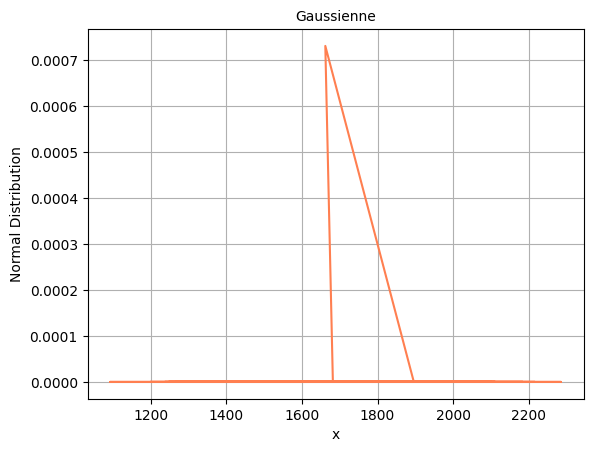

In [ ]:
import scipy.stats
import numpy as np
array = []
for _ in range(100):
    game = chess.pgn.read_game(pgn)
    array.append(int(game.headers.get("WhiteElo")))
    mean_array = np.mean(array)
    
x = scipy.stats.shapiro(array)
print(x.pvalue)
array.sort()



y = scipy.stats.norm.pdf(array,mean_array)
plt.plot(array,y, color='coral')
plt.grid()


plt.title('Gaussienne',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

plt.show()


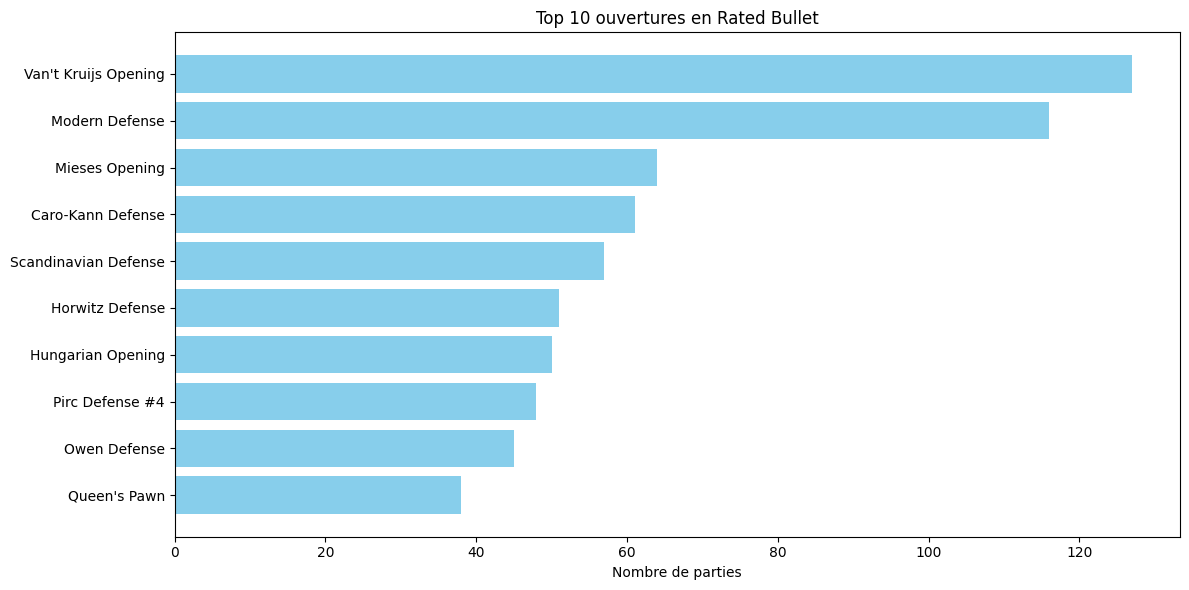

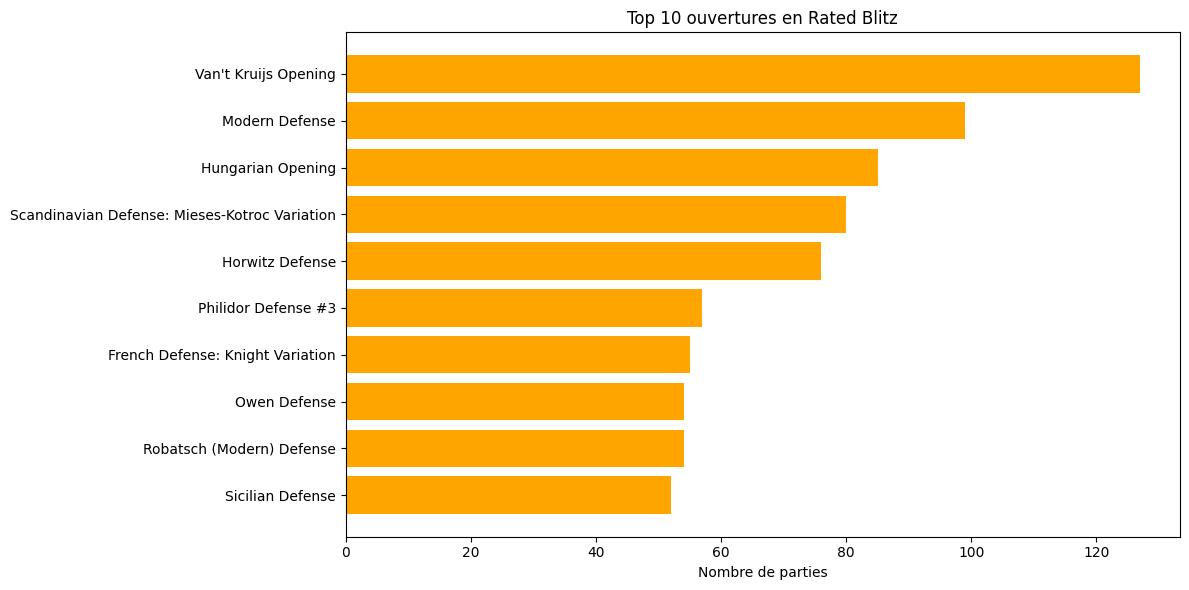

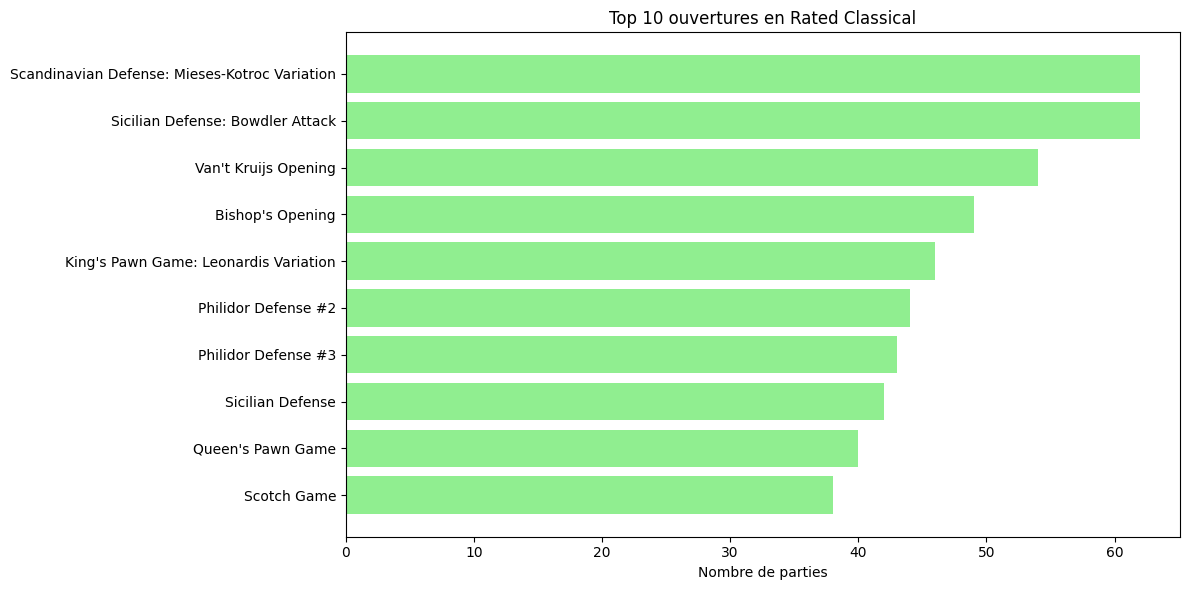

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import chess.pgn

bullet_stats = Counter()
blitz_stats = Counter()
classical_stats = Counter()
blitz_stats_ECO = Counter()

for _ in range(10000):
    game = chess.pgn.read_game(pgn)
    if (game.headers.get("Opening") == "?"):
        continue
    if game is None:
        break

    event = game.headers.get("Event", "")
    opening = game.headers.get("Opening", "Unknown")



    if "Rated Bullet" in event:
        bullet_stats[opening] += 1
    elif "Rated Blitz" in event:
        blitz_stats[opening] += 1
    elif "Rated Classical" in event:
        classical_stats[opening] += 1

def plot_openings(stats, title, color):
    top_openings = stats.most_common(10)
    openings = [item[0] for item in top_openings]
    counts = [item[1] for item in top_openings]

    plt.figure(figsize=(12, 6))
    plt.barh(openings[::-1], counts[::-1], color=color)
    plt.xlabel("Nombre de parties")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_openings(bullet_stats, "Top 10 ouvertures en Rated Bullet", "skyblue")
plot_openings(blitz_stats, "Top 10 ouvertures en Rated Blitz", "orange")
plot_openings(classical_stats, "Top 10 ouvertures en Rated Classical", "lightgreen")


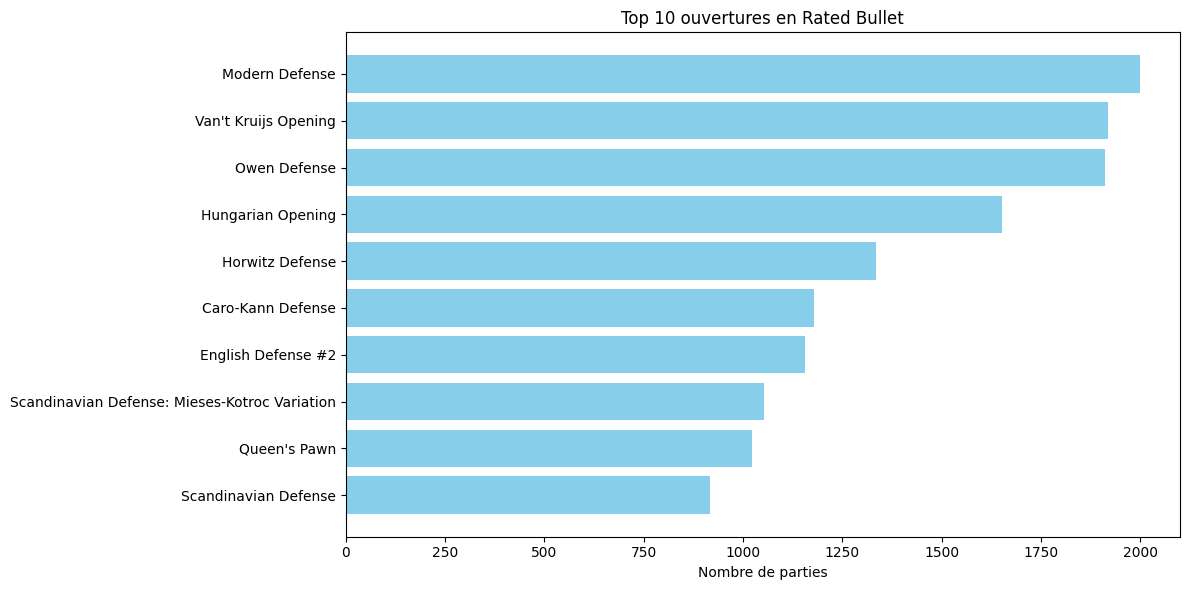

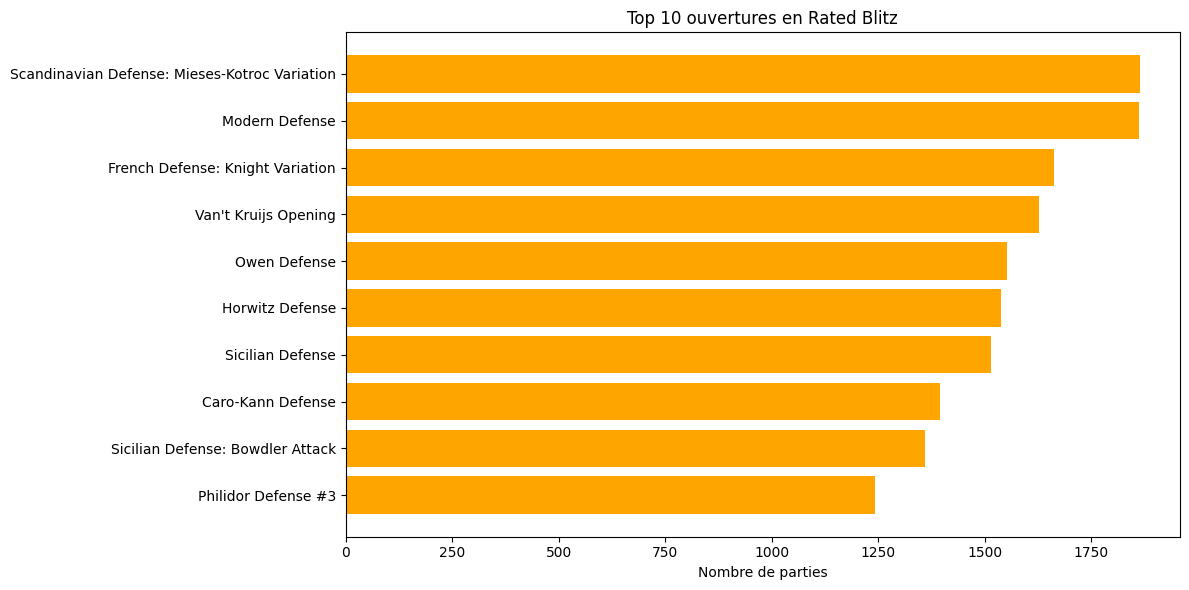

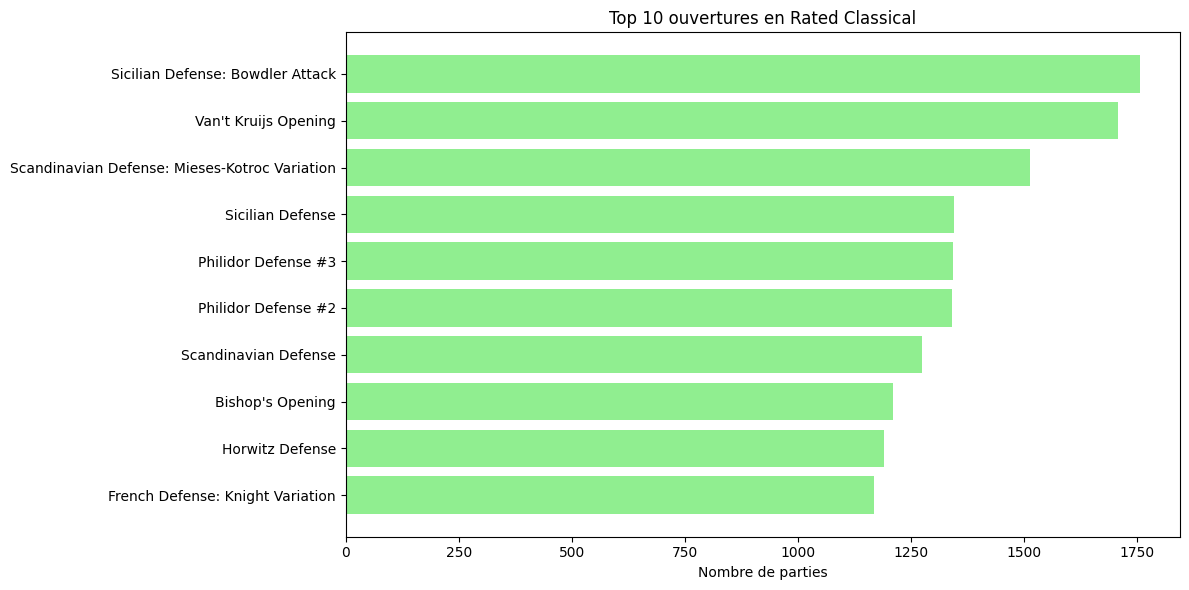

In [5]:
bullet_stats = Counter()
blitz_stats = Counter()
classical_stats = Counter()


for _ in range(300000):
    game = chess.pgn.read_game(pgn)
    if game is None:
        break

    event = game.headers.get("Event", "")
    opening = game.headers.get("Opening", "Unknown")

    if "Rated Bullet game" in event:
        bullet_stats[opening] += 1
    elif "Rated Blitz game" in event:
        blitz_stats[opening] += 1
    elif "Rated Classical game" in event:
        classical_stats[opening] += 1

def plot_openings(stats, title, color):
    top_openings = stats.most_common(10)
    openings = [item[0] for item in top_openings]
    counts = [item[1] for item in top_openings]

    plt.figure(figsize=(12, 6))
    plt.barh(openings[::-1], counts[::-1], color=color)
    plt.xlabel("Nombre de parties")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_openings(bullet_stats, "Top 10 ouvertures en Rated Bullet", "skyblue")
plot_openings(blitz_stats, "Top 10 ouvertures en Rated Blitz", "orange")
plot_openings(classical_stats, "Top 10 ouvertures en Rated Classical", "lightgreen")


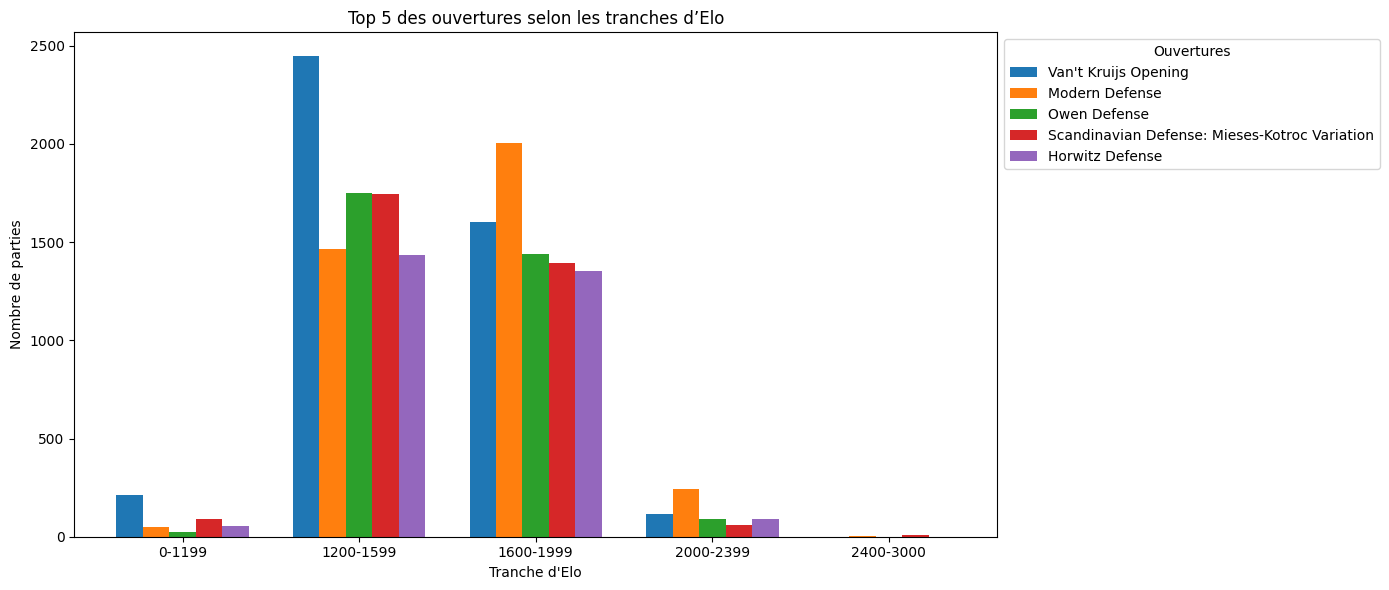

In [3]:
from collections import defaultdict, Counter
import numpy as np

elo_ranges = [(0, 1199), (1200, 1599), (1600, 1999), (2000, 2399), (2400, 3000)]
elo_labels = [f"{low}-{high}" for low, high in elo_ranges]
elo_opening_stats = {label: Counter() for label in elo_labels}

for _ in range(200000):
    game = chess.pgn.read_game(pgn)
    if game is None:
        break

    try:
        white_elo = int(game.headers.get("WhiteElo", 0))
        black_elo = int(game.headers.get("BlackElo", 0))
        average_elo = (white_elo + black_elo) // 2
        opening = game.headers.get("Opening", "Unknown")
    except:
        continue

    for (low, high), label in zip(elo_ranges, elo_labels):
        if low <= average_elo <= high:
            elo_opening_stats[label][opening] += 1
            break

total_opening_counts = sum(elo_opening_stats.values(), Counter())
top_openings = [opening for opening, _ in total_opening_counts.most_common(5)]

bar_width = 0.15
x = np.arange(len(elo_labels))

plt.figure(figsize=(14, 6))

for i, opening in enumerate(top_openings):
    counts = [elo_opening_stats[label][opening] for label in elo_labels]
    plt.bar(x + i * bar_width, counts, width=bar_width, label=opening)

plt.xlabel("Tranche d'Elo")
plt.ylabel("Nombre de parties")
plt.title("Top 5 des ouvertures selon les tranches d’Elo")
plt.xticks(x + bar_width * 2, elo_labels)
plt.legend(title="Ouvertures", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
